Processando base de dados

Variáveis: file, alg e min_support

In [65]:
import importlib
import utils.pre_processing_social_media as psm

importlib.reload(psm)

file = "vacinal_2025_jun"

input_file = "process_datasets/" + file + ".csv"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, txt_database = psm.pre_processing_database(input_file)

Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


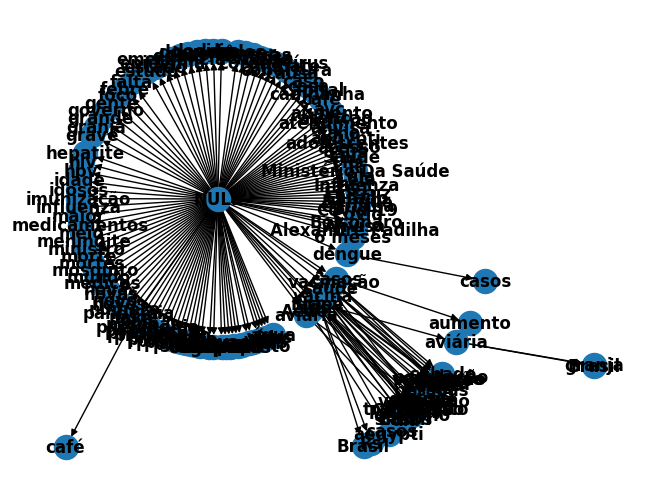

In [66]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
alg = 'Apriori'
#alg = 'FP-max'
min_support = 0.009

file_name = f"{file}_{alg}_{min_support}"
output_file = f"outputs/{file_name}.graphml"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [67]:
# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


In [50]:
import os
import utils.analize_tor as ator
import networkx as nx

pasta = "outputs_clusters"
os.makedirs(pasta, exist_ok=True)

# 5. Separa cluster central dos periféricos
print("Separando cluster central de periféricos...")
G_central, G_perifericos = ator.separar_clusters_por_tamanho(output_file)

# Salva os arquivos
path_cluster_central = os.path.join(pasta, file_name + "_cluster_central.graphml")
path_clusters_perifericos = os.path.join(pasta, file_name + "_clusters_perifericos.graphml")
nx.write_graphml(G_central, path_cluster_central)
nx.write_graphml(G_perifericos, path_clusters_perifericos)

Separando cluster central de periféricos...


Análise clusters

In [52]:
import importlib
importlib.reload(ator)

# 4. Extrai clusters com ramos hierárquicos
print("Extraindo clusters e ramos do grafo...")
all_clusters = ator.extrair_clusters(output_file)


Extraindo clusters e ramos do grafo...
Cluster 1 — Raiz: Aedes — 2 nós
Ramos: 
Aedes → aegypti
Palavras:
aegypti
--------------------------------------------------------------------------------
Cluster 2 — Raiz: Brasil — 2 nós
Ramos: 
Brasil → casos
Palavras:
casos
--------------------------------------------------------------------------------
Cluster 3 — Raiz: aviária — 3 nós
Ramos: 
aviária → granja
aviária → Brasil
Palavras:
granja, Brasil
--------------------------------------------------------------------------------
Cluster 4 — Raiz: casos — 2 nós
Ramos: 
casos → aumento
Palavras:
aumento
--------------------------------------------------------------------------------
Cluster 5 — Raiz: dengue — 2 nós
Ramos: 
dengue → casos
Palavras:
casos
--------------------------------------------------------------------------------
Cluster 6 — Raiz: fake — 2 nós
Ramos: 
fake → café
Palavras:
café
--------------------------------------------------------------------------------
Cluster 7 — Raiz

In [53]:
import pandas as pd
import importlib

importlib.reload(ator)

pasta = "outputs_clusters_csv"
os.makedirs(pasta, exist_ok=True)

# 5. Relaciona tweets aos clusters
print("Relacionando tweets aos clusters...")
tweets_clusters = ator.tweets_clusters(
    clusters=all_clusters, 
    textos_tokenizados=pre_processing_result, 
    textos_originais=txt_database
)

# Salva tweets relacionados por cluster
print("Salvando resultados...")
for c in tweets_clusters:
    if c["n_tweets"] == 0:
        continue
    nome = c["raiz"].replace(" ", "_")[:30]
    df_cluster = pd.DataFrame(c["tweets"])
    caminho = os.path.join(pasta, f"{file_name}_cluster_{c['cluster_idx']}_{nome}.csv")
    df_cluster.to_csv(caminho, index=False)

print("✅ Pipeline finalizado com sucesso.")

Relacionando tweets aos clusters...
Cluster 1 (Aedes) — 15 tweets relacionados
Cluster 2 (Brasil) — 12 tweets relacionados
Cluster 3 (aviária) — 27 tweets relacionados
Cluster 4 (casos) — 12 tweets relacionados
Cluster 5 (dengue) — 18 tweets relacionados
Cluster 6 (fake) — 12 tweets relacionados
Cluster 7 (gripe) — 101 tweets relacionados
Cluster 8 (saúde) — 81 tweets relacionados
Cluster 9 (sus) — 14 tweets relacionados
Cluster 10 (vacina) — 122 tweets relacionados
Cluster 11 (vacinação) — 36 tweets relacionados
Salvando resultados...
✅ Pipeline finalizado com sucesso.


Sumarização com IA

In [56]:
import importlib
importlib.reload(ator)

cluster = 7
prompt = ator.prompt_IA(all_clusters[cluster-1])
print(prompt)

Considere os tweets a seguir, que foram identificados como relacionados ao assunto gripe. Eles mencionam com frequência palavras como: sábado, aviária, casos, Brasil, governo, vacinação, dia, granja, Rs, população. Com base nesse conteúdo, gere um pequeno texto de 1 a 2 parágrafos, com uma síntese clara e objetiva sobre o que está sendo discutido nos tweets. O texto deve ajudar qualquer pessoa a entender rapidamente o teor das conversas, mesmo que ela não tenha lido os tweets originais. Retorne somente o resumo.


Ranking de palavras p/ Nuvem de palavras

In [57]:
import csv
import importlib
importlib.reload(ator)

pasta = "ranking_palavras"
os.makedirs(pasta, exist_ok=True)

ranking = ator.ranking_words(pre_processing_result)
caminho = os.path.join(pasta, f"{file_name}_ranking_palavras.csv")
with open(caminho, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

Outras visualizações

R callback write-console: In addition:   
R callback write-console: There were 50 or more warnings (use warnings() to see the first 50)  
R callback write-console: 
  


Número de regras: 10


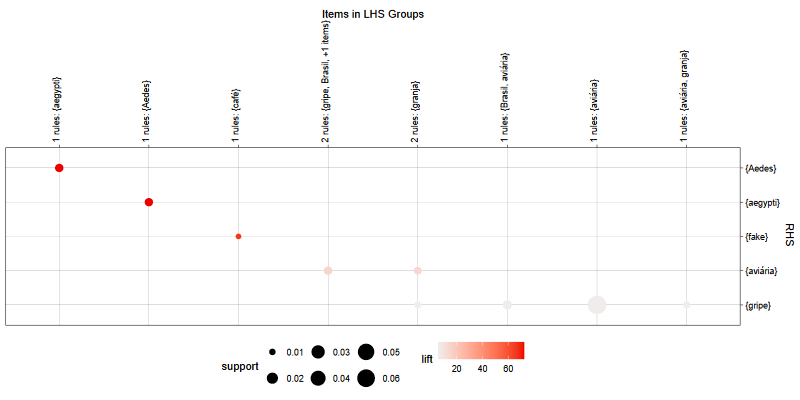

In [93]:
import utils.other_visualizations as ovi
from arulespy.arulesViz import plot
from rpy2.ipython.ggplot import image_png

importlib.reload(ovi)

rules = ovi.get_rules_to_arulespy(pre_processing_result, min_support)

print(f"Número de regras: {len(rules)}")

gg = plot(rules, method="grouped") 
image_png(gg)

R callback write-console: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.
  


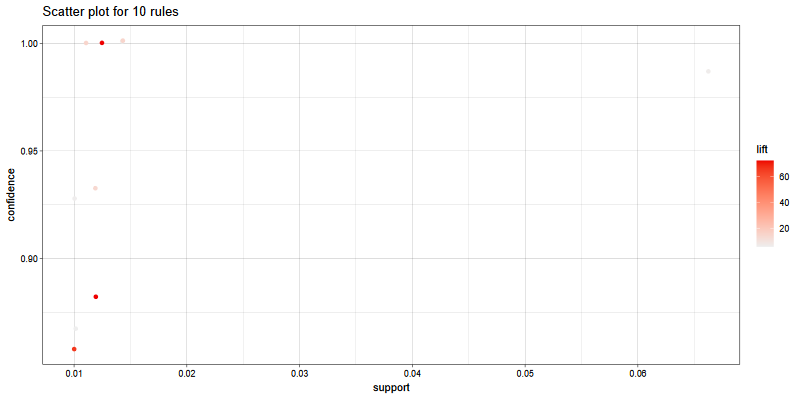

In [94]:

gg = plot(rules, method="scatter") 
image_png(gg)

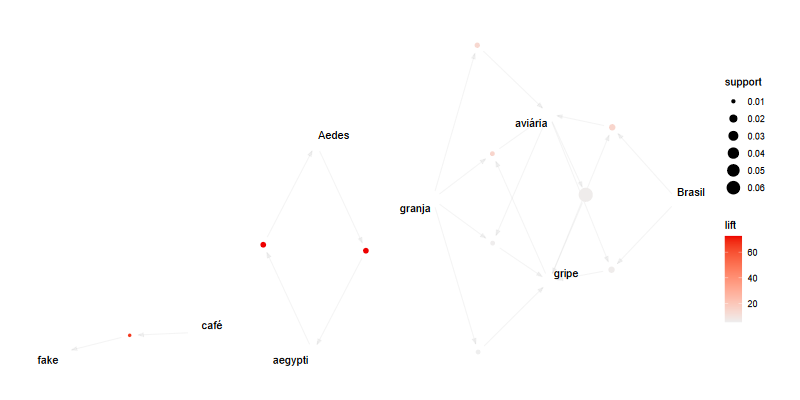

In [95]:
gg = plot(rules, method="graph") 
image_png(gg)